In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import datetime

In [2]:
today = datetime.date.today().isoformat()
today

'2020-05-14'

In [3]:
# source: https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Projekte_RKI/Nowcasting.html
!wget "https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Projekte_RKI/Nowcasting_Zahlen.xlsx?__blob=publicationFile" -O Nowcasting_Zahlen_{today}.xlsx

--2020-05-14 15:25:56--  https://www.rki.de/DE/Content/InfAZ/N/Neuartiges_Coronavirus/Projekte_RKI/Nowcasting_Zahlen.xlsx?__blob=publicationFile
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving www.rki.de (www.rki.de)... 104.18.13.73
Connecting to www.rki.de (www.rki.de)|104.18.13.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13825 (14K) [application/vnd.openxmlformats-officedocument.spreadsheetml.sheet]
Saving to: ‘Nowcasting_Zahlen_2020-05-14.xlsx’

Nowcasting_Zahlen_2 100%[===================>]  13,50K  --.-KB/s    in 0s      

2020-05-14 15:25:56 (82,0 MB/s) - ‘Nowcasting_Zahlen_2020-05-14.xlsx’ saved [13825/13825]



In [4]:
# source: https://gitlab.com/simm/covid19/secir
!wget "https://gitlab.com/simm/covid19/secir/-/raw/master/img/dynamic/Rt_rawData/Germany_Rt.csv?inline=false" -O SECIR_{today}.csv

--2020-05-14 15:25:56--  https://gitlab.com/simm/covid19/secir/-/raw/master/img/dynamic/Rt_rawData/Germany_Rt.csv?inline=false
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving gitlab.com (gitlab.com)... 2606:4700:90:0:f22e:fbec:5bed:a9b9, 172.65.251.78
Connecting to gitlab.com (gitlab.com)|2606:4700:90:0:f22e:fbec:5bed:a9b9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘SECIR_2020-05-14.csv’

SECIR_2020-05-14.cs     [ <=>                ] 175,10K  --.-KB/s    in 0,02s   

2020-05-14 15:25:57 (7,59 MB/s) - ‘SECIR_2020-05-14.csv’ saved [179300]



In [5]:
raw_data = {
    'nowcasting': pd.read_excel(f"./Nowcasting_Zahlen_{today}.xlsx", sheet_name="Nowcast_R"),
    'secir': pd.read_csv(f"./SECIR_{today}.csv")
}

In [6]:
raw_data["nowcasting"]

,Datum des Erkrankungsbeginns,Punktschätzer der Anzahl Neuerkrankungen (ohne Glättung),Untere Grenze des 95%-Prädiktionsintervalls der Anzahl Neuerkrankungen (ohne Glä,Obere Grenze des 95%-Prädiktionsintervalls der Anzahl Neuerkrankungen (ohne Glät,Punktschätzer der Anzahl Neuerkrankungen,Untere Grenze des 95%-Prädiktionsintervalls der Anzahl Neuerkrankungen,Obere Grenze des 95%-Prädiktionsintervalls der Anzahl Neuerkrankungen,Punktschätzer der Reproduktionszahl R,Untere Grenze des 95%-Prädiktionsintervalls der Reproduktionszahl R,Obere Grenze des 95%-Prädiktionsintervalls der Reproduktionszahl R
0,2020-03-02,308,291,325,225,212,240,NaN,NaN,NaN
1,2020-03-03,326,310,342,262,247,278,NaN,NaN,NaN
2,2020-03-04,453,431,474,328,311,345,NaN,NaN,NaN
3,2020-03-05,498,472,521,396,376,415,NaN,NaN,NaN
4,2020-03-06,766,740,792,511,488,532,2.27,2.19,2.36
...,...,...,...,...,...,...,...,...,...,...
64,2020-05-05,895,699,1074,846,716,978,0.95,0.88,1.03
65,2020-05-06,826,622,1015,864,703,1022,1.02,0.92,1.14
66,2020-05-07,691,480,862,839,652,1009,1.03,0.90,1.17
67,2020-05-08,705,482,1009,779,571,990,0.95,0.80,1.10


In [7]:
raw_data["secir"]

,date,Iter_1,Iter_2,Iter_3,Iter_4,Iter_5,Iter_6,Iter_7,Iter_8,Iter_9,...,Iter_95,Iter_96,Iter_97,Iter_98,Iter_99,Iter_100,Iter_101,Iter_102,Iter_103,Iter_104
0,2020-02-03,1.359362,1.787352,1.193912,1.266235,1.934872,1.260838,1.428834,1.313659,1.671712,...,1.448627,1.749722,1.755024,1.376247,1.247357,2.187271,1.852376,1.810907,1.364534,1.568582
1,2020-02-04,1.643458,2.044783,1.481711,1.535191,2.174714,1.556255,1.725943,1.487617,1.860051,...,1.608323,2.043016,1.920820,1.639837,1.511418,2.301055,2.193413,2.008136,1.734023,1.843602
2,2020-02-05,1.539920,1.876696,1.427080,1.447515,2.004416,1.470252,1.632515,1.378960,1.700254,...,1.473910,1.880418,1.739510,1.528932,1.422235,2.037170,2.024453,1.847119,1.668537,1.740440
3,2020-02-06,1.392930,1.668082,1.327490,1.318545,1.793743,1.339150,1.491073,1.242777,1.509774,...,1.313696,1.672143,1.532161,1.377740,1.292109,1.756946,1.804217,1.651460,1.544643,1.591611
4,2020-02-07,1.241273,1.463779,1.215508,1.184728,1.585161,1.201266,1.341285,1.109110,1.326825,...,1.159822,1.465653,1.335539,1.224258,1.157710,1.500323,1.582788,1.458486,1.405455,1.435071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2020-05-06,0.594993,0.493398,0.592268,0.606620,0.449109,0.606122,0.538682,0.665943,0.536358,...,0.637252,0.502714,0.566191,0.601830,0.637107,0.510437,0.459349,0.510559,0.493126,0.486038
94,2020-05-07,0.747012,0.616289,0.730659,0.758344,0.552898,0.759987,0.669044,0.831081,0.669363,...,0.797936,0.630212,0.710626,0.755920,0.798824,0.641604,0.572828,0.633548,0.607383,0.597441
95,2020-05-08,0.860377,0.709160,0.834999,0.867162,0.632492,0.872291,0.770639,0.946968,0.767624,...,0.912986,0.727773,0.820644,0.869754,0.915628,0.741276,0.660018,0.731984,0.696341,0.684746
96,2020-05-09,0.877136,0.723689,0.854518,0.878197,0.646354,0.885765,0.791966,0.956358,0.779385,...,0.924294,0.745572,0.839725,0.884572,0.928392,0.758340,0.674050,0.755804,0.713466,0.703402


In [8]:
data = {}
sources = {
    'secir': 'Helmholtz SECIR',
    'nowcasting': 'RKI Nowcasting'
}

In [9]:
# Nowcasting

cols = {
    'Datum des Erkrankungsbeginns': 'date',
    'Punktschätzer der Reproduktionszahl R': 'r', 
    'Untere Grenze des 95%-Prädiktionsintervalls der Reproduktionszahl R': 'rmin',
    'Obere Grenze des 95%-Prädiktionsintervalls der Reproduktionszahl R': 'rmax'
}
data['nowcasting'] = raw_data['nowcasting'][cols.keys()].rename(columns=cols)
data['nowcasting']

,date,r,rmin,rmax
0,2020-03-02,NaN,NaN,NaN
1,2020-03-03,NaN,NaN,NaN
2,2020-03-04,NaN,NaN,NaN
3,2020-03-05,NaN,NaN,NaN
4,2020-03-06,2.27,2.19,2.36
...,...,...,...,...
64,2020-05-05,0.95,0.88,1.03
65,2020-05-06,1.02,0.92,1.14
66,2020-05-07,1.03,0.90,1.17
67,2020-05-08,0.95,0.80,1.10


In [10]:
# SECIR
# "we obtain a distribution of Rt values for each date. The results of simulations are given in different columns in the CSV files."
# https://gitlab.com/simm/covid19/secir

# ymin=Quant.025, ymax=Quant.975

values_only = raw_data["secir"][raw_data["secir"].columns.difference(['date'])]
values_only.quantile(axis=1,q=0.975)

data['secir'] = pd.DataFrame({
    'date': pd.to_datetime(raw_data["secir"]["date"]),
    'rmin': values_only.quantile(axis=1, q=0.025),
    'rmax': values_only.quantile(axis=1, q=0.975),
    'r': values_only.quantile(axis=1, q=0.5),
})
data['secir'] = data['secir'][data['secir']['date'] >= pd.to_datetime('2020-03-06')]
data['secir']

,date,rmin,rmax,r
32,2020-03-06,4.212185,8.165297,5.497589
33,2020-03-07,3.731934,7.185795,4.853557
34,2020-03-08,3.163739,5.986504,4.062008
35,2020-03-09,2.956231,5.570709,3.786408
36,2020-03-10,3.065223,5.814937,3.928006
...,...,...,...,...
93,2020-05-06,0.414220,0.658347,0.561941
94,2020-05-07,0.513541,0.821174,0.701798
95,2020-05-08,0.590299,0.936876,0.807901
96,2020-05-09,0.601159,0.948331,0.827266


In [11]:
measures=[
    ('2020-03-10', 'Major events cancelled'),
    ('2020-03-12', 'Merkel calls for avoiding social contacts'),
    ('2020-03-16', 'Shops, schools and day-care centres closed,\nReligious services prohibited, entry ban'),
]

antimeasures=[
    ('2020-04-20',"First relaxation of measures"),
]

In [12]:
to_date = pd.to_datetime

In [13]:
last = {k: d.to_dict(orient="records")[-1] for k, d in data.items()}
last

{'nowcasting': {'date': Timestamp('2020-05-09 00:00:00'),
  'r': 0.81,
  'rmin': 0.66,
  'rmax': 0.97},
 'secir': {'date': Timestamp('2020-05-10 00:00:00'),
  'rmin': 0.5316326043555762,
  'rmax': 0.8436305561258541,
  'r': 0.736156281793005}}

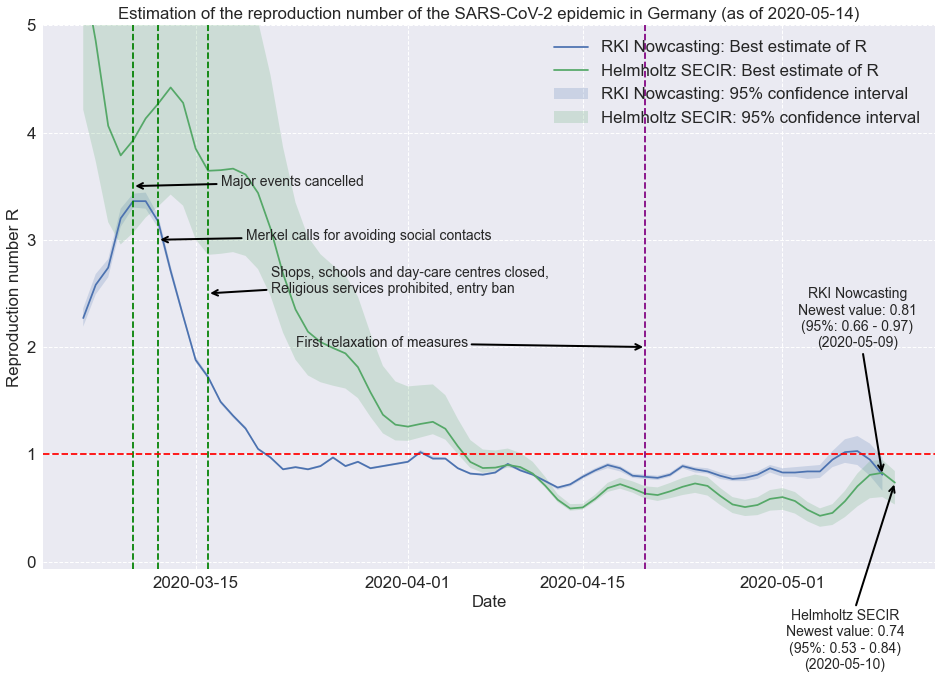

In [14]:
matplotlib.style.use('seaborn')
s = 1.5
fs = 'large'
params = {'font.size' : 14,
          'legend.fontsize': fs,
          'figure.figsize': (8*s,5.5*s),
          'axes.labelsize': fs,
          'axes.titlesize':fs,
          'xtick.labelsize':fs,
          'ytick.labelsize':fs,
          'axes.formatter.use_locale': True}
plt.rcParams.update(params)

arrowprops = {'arrowstyle': '->','lw':2}

fig = plt.figure(figsize=(16, 10))
plt.title(f"Estimation of the reproduction number of the SARS-CoV-2 epidemic in Germany (as of {today})")
#plt.figtext(0.9, 0.01, 'Sources: ' + ', '.join(sources.values()), horizontalalignment='right')
plt.xlabel("Date")
plt.ylabel("Reproduction number R")
for name, d in data.items():
    plt.plot(d["date"],d["r"],label=f"{sources[name]}: Best estimate of R")
    plt.fill_between(d["date"], d["rmin"], d["rmax"], alpha=0.2,label=f"{sources[name]}: 95% confidence interval")

#fig.autofmt_xdate()
ax = plt.gca()
ax.xaxis_date()
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y-%m-%d"))
ax.set_ylim(top=5)

for m in measures:
    plt.axvline(to_date(m[0]),ls='--',c='green')
    
for m in antimeasures:
    plt.axvline(to_date(m[0]),ls='--',c='purple')
    
for idx, (date, txt) in enumerate(measures+antimeasures):
    y=3.5-idx*0.5
    x=to_date(date)
    plt.annotate(txt,(x,y),xytext=(to_date('2020-03-17') + pd.Timedelta(days=2 * idx),y),arrowprops=arrowprops)

for name, d in last.items():
    date = d['date'].isoformat()[:10]
    last_text = f"{sources[name]}\nNewest value: {d['r']:.2f}\n(95%: {d['rmin']:.2f} - {d['rmax']:.2f})\n({date})"
    last_xy = (d['date'],d['r'])
    last_xytext = (d['date']-pd.Timedelta(days=4),-1) if name != 'nowcasting' else (d['date']-pd.Timedelta(days=2),2)
    plt.annotate(last_text,last_xy,last_xytext,arrowprops=arrowprops,ha='center')

plt.axhline(1,c='red',ls='--')
plt.grid(ls='--')
plt.legend()
plt.savefig("plot_{}.png".format(today),dpi=100)